<a href="https://colab.research.google.com/github/feicccccccc/colab_sandbox/blob/master/MNIST_keras_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A testing to use colab to perform MNIST training using Keras

## First step: Import library including


1.   Keras (deeplearning framework)
2.   matplotlib (to plot graph)
3.   numpy



In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

### Get the MNIST data set from keras default dataloader

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Show part of the data set in term of pixel map and there output y

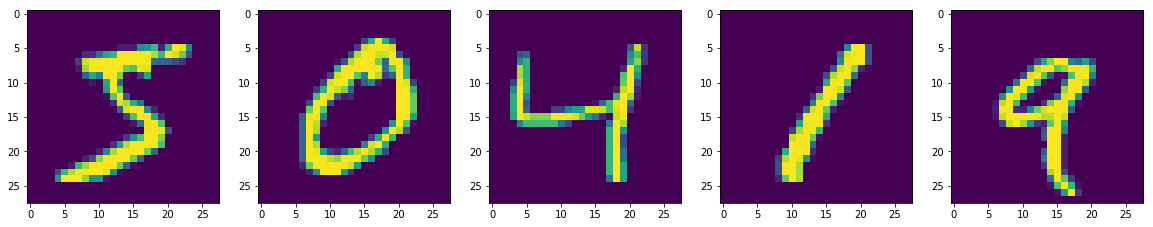

In [156]:
images=[x_train[0,:],x_train[1,:],x_train[2,:],x_train[3,:],x_train[4,:]]

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [157]:
print("First label  = ", y_train[0])
print("Second Label = ", y_train[1])
print("Third label  = ", y_train[2])
print("Forth label  = ", y_train[3])
print("Fifth label  = ", y_train[4])

First label  =  5
Second Label =  0
Third label  =  4
Forth label  =  1
Fifth label  =  9


### Data pre processing
### Normalise the raw data

In [158]:
print("Original data at x some pixel = ", x_train[0,7])

Original data at x some pixel =  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  93  82  82  56  39   0   0   0   0   0]


In [0]:
x_train_reshaped = x_train / 255
x_test_reshaped = x_test / 255

x_train_reshaped = x_train_reshaped.reshape(x_train.shape[0], 28, 28, 1)
x_test_reshaped = x_test_reshaped.reshape(x_test.shape[0], 28, 28, 1)

In [160]:
print("New data at x some pixel = ", x_train_reshaped[0,7])

New data at x some pixel =  [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.19215686]
 [0.93333333]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.98431373]
 [0.36470588]
 [0.32156863]
 [0.32156863]
 [0.21960784]
 [0.15294118]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


### Transform the output to one-hot data encoding

In [0]:
from keras.utils import to_categorical

y_train_reshaped = to_categorical(y_train, 10)
y_test_reshaped = to_categorical(y_test, 10)

In [162]:
print("one hot encoding for the first training data = ", y_train_reshaped[0])

one hot encoding for the first training data =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Create the model using Keras API

### Get the input and output dimension from the input data

In [163]:
print("shape of the training sample = ", x_train_reshaped.shape)
print("shape of the output lable = ", y_train_reshaped.shape)

m , n_w, n_h, n_c = x_train_reshaped.shape
_ , n_y = y_train_reshaped.shape


shape of the training sample =  (60000, 28, 28, 1)
shape of the output lable =  (60000, 10)


### Create model (computational graph)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(n_w,n_h,n_c)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

## Compile the model and define the loss fuunction and gradient descent method.

In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

### Summary of the model

In [166]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 64)          0         
__________

### computational graph of the model

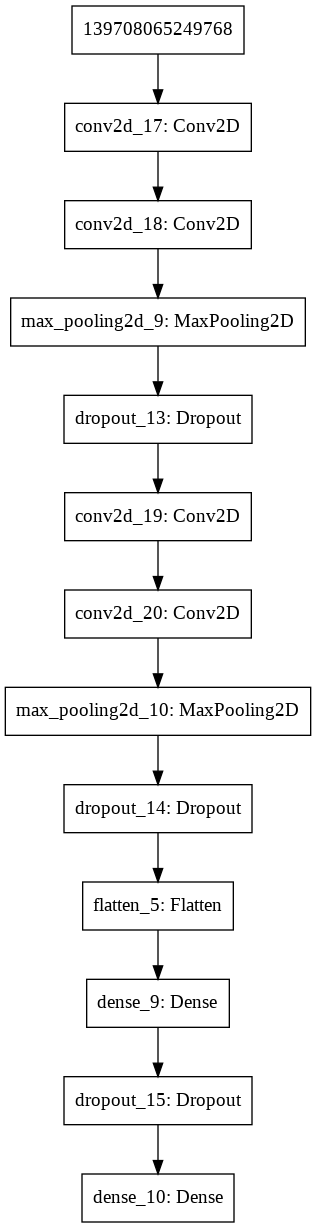

In [167]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png')
Image(filename='model.png') 

# Train the model

In [168]:
model.fit(x_train_reshaped, y_train_reshaped, epochs=10, batch_size=512)

Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.5208 - acc: 0.8285
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1229 - acc: 0.9627
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0840 - acc: 0.9749
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0663 - acc: 0.9802
Epoch 5/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0561 - acc: 0.9831
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0498 - acc: 0.9852
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0433 - acc: 0.9869
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0399 - acc: 0.9877
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0376 - acc: 0.9887
Epoch 10/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0330 - acc: 0.9900

## Test model performance

In [169]:
score = model.evaluate(x_test_reshaped, y_test_reshaped, batch_size=128)
print("loss, mertric = ", score)

10000/10000 [==============================] - 0s 42us/step
loss, mertric =  [0.026226845353562386, 0.9911]


## input Example:

Model output =  [[9.6175529e-07 3.5086605e-06 1.9549134e-06 7.8656631e-05 2.2498576e-04
  8.5293186e-06 2.1147140e-09 2.7106607e-03 3.1338062e-05 9.9693942e-01]]
The input character =  [9]


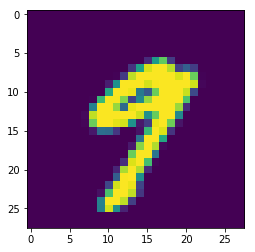

In [173]:
sample_idx = 20

image= x_test[sample_idx,:]

plt.imshow(image)

foo = np.expand_dims(x_test_reshaped[sample_idx,:], axis=0)

predict = model.predict(foo)

print("Model output = ", predict)

result = np.where(predict == np.amax(predict))

print("The input character = ", result[1])

# Try upload your own image and test the ConvNet

### you can create the image in the follwing websit: 

http://kleki.com

Please use a larger brush or the storke will disappear after resize. (around 75)

The follwing code will automatically resize the image and fed it into the network for prediction

In [171]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

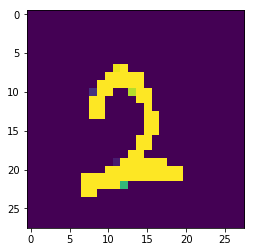

Model output =  [[2.0250586e-06 9.7459933e-04 9.9892765e-01 4.6995894e-05 5.0977712e-07
  5.5689139e-08 5.5581321e-08 9.5451005e-06 3.7749480e-05 8.0163954e-07]]
The input character =  [2]


In [175]:
import cv2

def inverse_color(image):

    height,width = image.shape
    img2 = image.copy()

    for i in range(height):
        for j in range(width):
            img2[i,j] = (255-image[i,j]) 
    return img2

img = cv2.imread(fn)
resized_img = cv2.resize(img, (28, 28))
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
gray = inverse_color(gray)

plt.imshow(gray)
plt.show()

normalised_img = gray / 255

foo2 = np.expand_dims(np.expand_dims(normalised_img, axis=0), axis=-1)

predict_user = model.predict(foo2)

print("Model output = ", predict_user)

result_user = np.where(predict_user == np.amax(predict_user))

print("The input character = ", result_user[1])